# Production of electricity through renewable sources: A comparative between Brazil's production and the three economies ahead of Brazil on IMF's nominal GDP rank for 2020.

### Importing necessary libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create DataFrame
# Columns repeated after the method to specify the desired order.

In [9]:
production = pd.read_csv('Electricity_Production_By_Source.csv', usecols=['Entity', 'Year', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Electricity from wind (TWh)', 'Electricity from other renewables (TWh)'],
index_col='Entity')[['Year', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Electricity from wind (TWh)', 'Electricity from other renewables (TWh)']]

# Index set directly in the read_csv method, as well as choosing the desired columns with use_col=

In [8]:
production.head() # Checking Dataframe

,Year,Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from wind (TWh),Electricity from other renewables (TWh)
Entity,,,,,
Afghanistan,2000,0.312,0.0,0.0,0.0
Afghanistan,2001,0.498,0.0,0.0,0.0
Afghanistan,2002,0.555,0.0,0.0,0.0
Afghanistan,2003,0.630,0.0,0.0,0.0
Afghanistan,2004,0.565,0.0,0.0,0.0


In [10]:
production.loc['Brazil'].tail(11) # .tail() specifies the range of analysis (last decade).

,Year,Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from wind (TWh),Electricity from other renewables (TWh)
Entity,,,,,
Brazil,2010,399.256000,0.001000,2.177000,31.495000
Brazil,2011,424.050000,0.002000,2.705000,32.434000
Brazil,2012,411.189000,0.007000,5.050000,35.645000
Brazil,2013,387.082000,0.005000,6.580000,40.762000
Brazil,2014,369.705000,0.016000,12.210000,46.688000
Brazil,2015,356.146000,0.059000,21.630000,49.446000
Brazil,2016,377.102000,0.085000,33.490000,50.936000
Brazil,2017,367.197000,0.832000,42.370000,52.539000
Brazil,2018,385.081000,3.461000,48.475000,53.911000


### Checking and cleaning Data

In [11]:
# Checking whether the countries of our sample have missing data or not and if there are duplicated values.

In [14]:
production.loc['Brazil'].isnull().sum()
production.loc['Russia'].isnull().sum()
production.loc['South Korea'].isnull().sum() # Confirmed! No missing null data.
production.loc['Canada'].isnull().sum()

Year                                       0
Electricity from hydro (TWh)               0
Electricity from solar (TWh)               0
Electricity from wind (TWh)                0
Electricity from other renewables (TWh)    0
dtype: int64

In [15]:
# Checking for duplicated values in each country.

In [16]:
production.loc['Brazil'].duplicated().any()
production.loc['Russia'].duplicated().any()
production.loc['South Korea'].duplicated().any() # No duplicated values. Great!
production.loc['Canada'].duplicated().any()

False

### Filtering the countries, range for the analisys (2010-2020) and renewable sources.

In [18]:
def ren_source(country, source=False):
    all_sources = production.loc[str(country)].tail(11)
    if source:
        if source == 'hydro':
            source = production.loc[[str(country)], 'Electricity from hydro (TWh)'].tail(11)
            return source
        elif source == 'solar':
            source = production.loc[[str(country)], 'Electricity from solar (TWh)'].tail(11)
            return source
        elif source == 'wind':
            source = production.loc[[str(country)], 'Electricity from wind (TWh)'].tail(11)
            return source
        elif source == 'other':
            source = production.loc[[str(country)], 'Electricity from other renewables (TWh)'].tail(11)
            return source
    else:
        return all_sources

In [28]:
# Brazil's info in our range.

ren_source('Brazil') # Returns whole range table when source not specified

,Year,Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from wind (TWh),Electricity from other renewables (TWh)
Entity,,,,,
Brazil,2010,399.256000,0.001000,2.177000,31.495000
Brazil,2011,424.050000,0.002000,2.705000,32.434000
Brazil,2012,411.189000,0.007000,5.050000,35.645000
Brazil,2013,387.082000,0.005000,6.580000,40.762000
Brazil,2014,369.705000,0.016000,12.210000,46.688000
Brazil,2015,356.146000,0.059000,21.630000,49.446000
Brazil,2016,377.102000,0.085000,33.490000,50.936000
Brazil,2017,367.197000,0.832000,42.370000,52.539000
Brazil,2018,385.081000,3.461000,48.475000,53.911000


In [23]:
# Checking function. Test: Electricity from hydro (TWh)

In [25]:
ren_source('Brazil', 'hydro'), ren_source('Brazil', 'solar') # Same values!

(Entity
 Brazil    399.256000
 Brazil    424.050000
 Brazil    411.189000
 Brazil    387.082000
 Brazil    369.705000
 Brazil    356.146000
 Brazil    377.102000
 Brazil    367.197000
 Brazil    385.081000
 Brazil    393.898000
 Brazil    391.198652
 Name: Electricity from hydro (TWh), dtype: float64,
 Entity
 Brazil    0.001000
 Brazil    0.002000
 Brazil    0.007000
 Brazil    0.005000
 Brazil    0.016000
 Brazil    0.059000
 Brazil    0.085000
 Brazil    0.832000
 Brazil    3.461000
 Brazil    6.655000
 Brazil    7.593308
 Name: Electricity from solar (TWh), dtype: float64)

### Getting the mean for each using the same structure from the previous function

In [27]:
def mean_source(country, source=False):
    all_sources = production.loc[str(country)].tail(11).mean()

    if source:
        if source == 'hydro':
            source = production.loc[[str(country)], 'Electricity from hydro (TWh)'].tail(11).mean()
            return source
        elif source == 'solar':
            source = production.loc[[str(country)], 'Electricity from solar (TWh)'].tail(11).mean()
            return source
        elif source == 'wind':
            source = production.loc[[str(country)], 'Electricity from wind (TWh)'].tail(11).mean()
            return source
        elif source == 'other':
            source = production.loc[[str(country)], 'Electricity from other renewables (TWh)'].tail(11).mean()
            return source
    else:
        return all_sources

In [34]:
production.loc[['Brazil'], 'Electricity from hydro (TWh)'].tail(11).mean() # Without the function

387.44587749090914

In [35]:
mean_source('Brazil', 'hydro') # With the function

387.44587749090914

### Data Visualization 1 - Comparison of electricity production among countries (line plot)

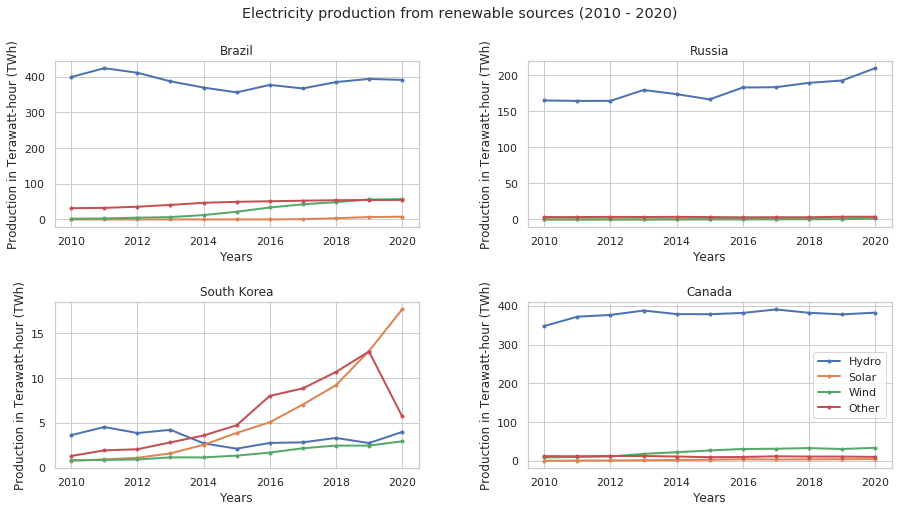

In [43]:
sns.set_theme(style='whitegrid')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.0})
period = list(range(2010, 2021))
plt.rcParams['figure.figsize'] = [15, 7.5] # Not in .py file. Added to adjust the size in Jupyter.
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(period, ren_source('Brazil', 'hydro'), label='Hydro', marker='.')
axs[0, 0].plot(period, ren_source('Brazil', 'solar'), label='Solar', marker='.')
axs[0, 0].plot(period, ren_source('Brazil', 'wind'), label='Wind', marker='.')
axs[0, 0].plot(period, ren_source('Brazil', 'other'), label='Other', marker='.')
axs[0, 0].set_title('Brazil')

axs[0, 1].plot(period, ren_source('Russia', 'hydro'), label='Hydro', marker='.')
axs[0, 1].plot(period, ren_source('Russia', 'solar'), label='Solar', marker='.')
axs[0, 1].plot(period, ren_source('Russia', 'wind'), label='Wind', marker='.')
axs[0, 1].plot(period, ren_source('Russia', 'other'), label='Other', marker='.')
axs[0, 1].set_title('Russia')

axs[1, 0].plot(period, ren_source('South Korea', 'hydro'), label='Hydro', marker='.')
axs[1, 0].plot(period, ren_source('South Korea', 'solar'), label='Solar', marker='.')
axs[1, 0].plot(period, ren_source('South Korea', 'wind'), label='Wind', marker='.')
axs[1, 0].plot(period, ren_source('South Korea', 'other'), label='Other', marker='.')
axs[1, 0].set_title('South Korea')

axs[1, 1].plot(period, ren_source('Canada', 'hydro'), label='Hydro', marker='.')
axs[1, 1].plot(period, ren_source('Canada', 'solar'), label='Solar', marker='.')
axs[1, 1].plot(period, ren_source('Canada', 'wind'), label='Wind', marker='.')
axs[1, 1].plot(period, ren_source('Canada', 'other'), label='Other', marker='.')
axs[1, 1].set_title('Canada')

# Setting labels for each plot
for ax in axs.flat:
    ax.set(xlabel='Years', ylabel='Production in Terawatt-hour (TWh)')
    
plt.suptitle('Electricity production from renewable sources (2010 - 2020)')
plt.subplots_adjust(wspace=0.3, hspace=0.45)
plt.legend()
plt.show()

### Data Visualization 2 - Mean of production by country/source (horizontal bar)

In [44]:
# Countries = y axis | source_means = x axis

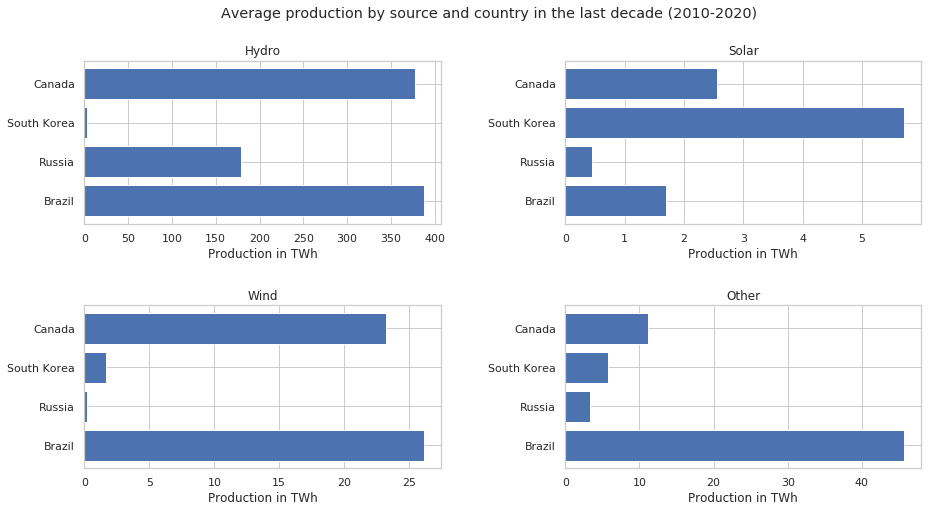

In [48]:
hydro_countries = ['Brazil', 'Russia', 'South Korea', 'Canada']
hydro_means = [mean_source('Brazil', 'hydro'), mean_source('Russia', 'hydro'), mean_source('South Korea', 'hydro'), mean_source('Canada', 'hydro')]

solar_countries = ['Brazil', 'Russia', 'South Korea', 'Canada']
solar_means = [mean_source('Brazil', 'solar'), mean_source('Russia', 'solar'), mean_source('South Korea', 'solar'), mean_source('Canada', 'solar')]

wind_countries = ['Brazil', 'Russia', 'South Korea', 'Canada']
wind_means = [mean_source('Brazil', 'wind'), mean_source('Russia', 'wind'), mean_source('South Korea', 'wind'), mean_source('Canada', 'wind')]

other_countries = ['Brazil', 'Russia', 'South Korea', 'Canada']
other_sources_means = [mean_source('Brazil', 'other'), mean_source('Russia', 'other'), mean_source('South Korea', 'other'), mean_source('Canada', 'other')]

# Setting the plot speficications (number of subplots, background, etc.)
sns.set_theme(style='whitegrid')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.0})
plt.rcParams['figure.figsize'] = [15, 7.5] # Not in .py file. Added to adjust the size in Jupyter.
fig, axs = plt.subplots(2, 2)

axs[0, 0].barh(hydro_countries, hydro_means)
axs[0, 0].set_title('Hydro')

axs[0, 1].barh(solar_countries, solar_means)
axs[0, 1].set_title('Solar')

axs[1, 0].barh(wind_countries, wind_means)
axs[1, 0].set_title('Wind')

axs[1, 1].barh(other_countries, other_sources_means)
axs[1, 1].set_title('Other')

for ax in axs.flat: # So that the two subplots show the xlabel
    ax.set(xlabel='Production in TWh')

plt.suptitle('Average production by source and country in the last decade (2010-2020)')
plt.subplots_adjust(wspace=0.35, hspace=0.5) # Space between subplots
plt.show()